## Imports

In [1]:
# Importações necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

## Get dataset

In [2]:
import pandas as pd

# URL do arquivo raw no GitHub
url = "https://raw.githubusercontent.com/jvlopess/customers-churn/refs/heads/main/data/customer_churn_telecom_services.csv"

# Leitura do dataset
data_original = pd.read_csv(url)

# Exibe as primeiras linhas do dataframe
data = data_original.copy()

data.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Passo 2: Dividir a base de dados em 3 subsets (folds)
folds = np.array_split(data.sample(frac=1, random_state=42), 3)

# (Opcional) Exibir o tamanho de cada fold
for i, fold in enumerate(folds, start=1):
    print(f"Fold {i} shape:", fold.shape)

Fold 1 shape: (2348, 20)
Fold 2 shape: (2348, 20)
Fold 3 shape: (2347, 20)


In [ ]:
# Passo 3: Análise Exploratória de Dados (EDA)
numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
categorical_cols = [
    "gender", "SeniorCitizen", "Partner", "Dependents",
    "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity",
    "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV",
    "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod",
    "Churn"
]

def perform_eda(df, subset_name="Treinamento"):
    print(f"\n=== EDA no subset: {subset_name} ===")
    
    # 1. Informações gerais
    print("\n1) Informações gerais:")
    print(df.info())
    
    # 2. Valores ausentes
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    if len(missing) > 0:
        print("\n2) Valores ausentes por coluna:")
        print(missing)
    else:
        print("\n2) Nenhum valor ausente encontrado.")
    
    # 3. Registros duplicados
    duplicates_count = df.duplicated().sum()
    print(f"\n3) Registros duplicados: {duplicates_count}")
    
    # 4. Estatísticas descritivas
    print("\n4) Estatísticas descritivas (incluindo categóricas):")
    print(df.describe(include="all"))
    
    # 5. Distribuição das variáveis numéricas: histogramas e boxplots
    for col in numeric_cols:
        if col in df.columns:
            plt.figure(figsize=(8,4))
            plt.hist(df[col].dropna(), bins=30, edgecolor='black')
            plt.title(f'Histograma de {col} - {subset_name}')
            plt.xlabel(col)
            plt.ylabel('Frequência')
            plt.show()

            plt.figure(figsize=(4,5))
            plt.boxplot(df[col].dropna(), vert=True)
            plt.title(f'Boxplot de {col} - {subset_name}')
            plt.ylabel(col)
            plt.show()
    
    # 6. Distribuição das variáveis categóricas: gráficos de barras
    for col in categorical_cols:
        if col in df.columns:
            plt.figure(figsize=(6,4))
            counts = df[col].value_counts()
            plt.bar(counts.index.astype(str), counts.values)
            plt.title(f'Distribuição de {col} - {subset_name}')
            plt.xlabel(col)
            plt.ylabel('Contagem')
            plt.xticks(rotation=45)
            plt.show()


===== Experimento 1 =====

=== EDA no subset: Treinamento+Validação (Fold 1) ===

1) Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4696 entries, 0 to 4695
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            4696 non-null   object 
 1   SeniorCitizen     4696 non-null   int64  
 2   Partner           4696 non-null   object 
 3   Dependents        4696 non-null   object 
 4   tenure            4696 non-null   int64  
 5   PhoneService      4696 non-null   object 
 6   MultipleLines     4696 non-null   object 
 7   InternetService   4696 non-null   object 
 8   OnlineSecurity    4696 non-null   object 
 9   OnlineBackup      4696 non-null   object 
 10  DeviceProtection  4696 non-null   object 
 11  TechSupport       4696 non-null   object 
 12  StreamingTV       4696 non-null   object 
 13  StreamingMovies   4696 non-null   object 
 14  Contract          4696 non-nul

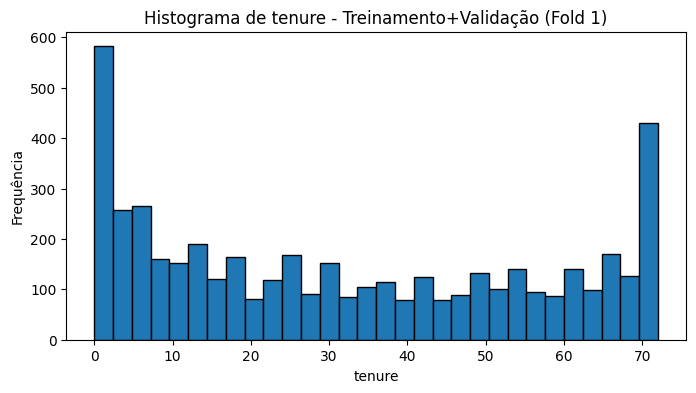

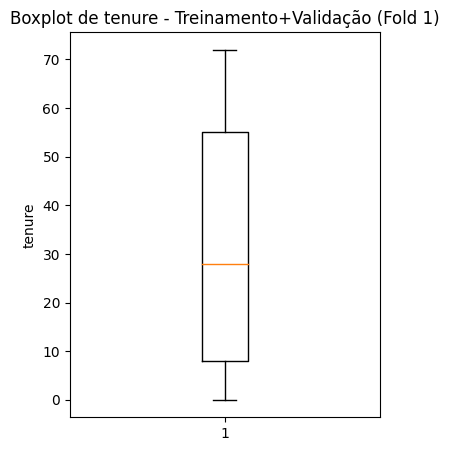

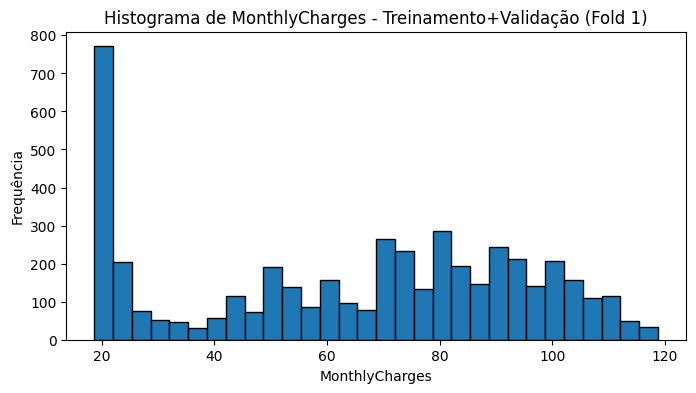

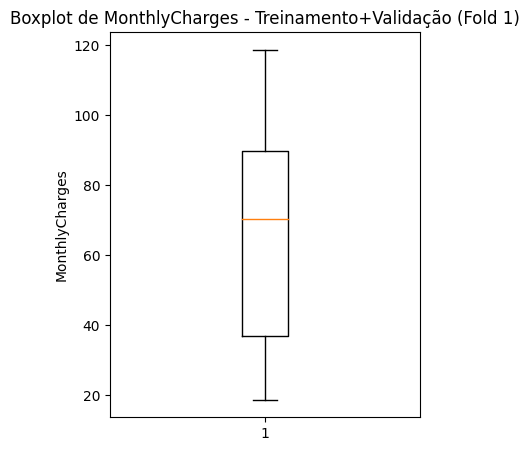

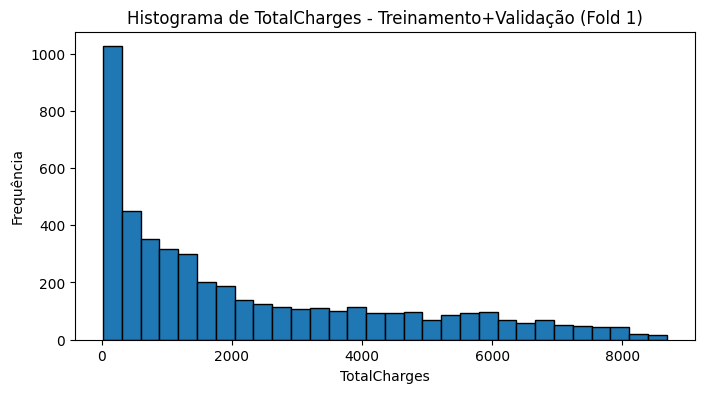

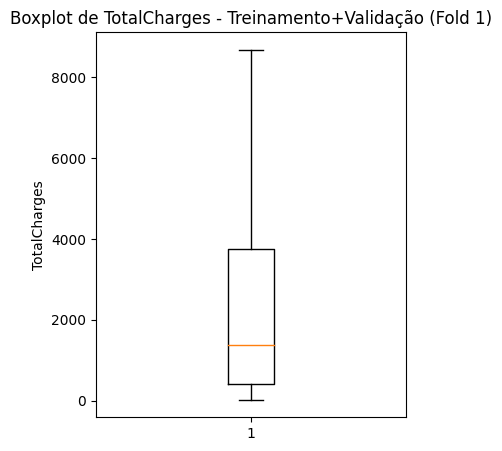

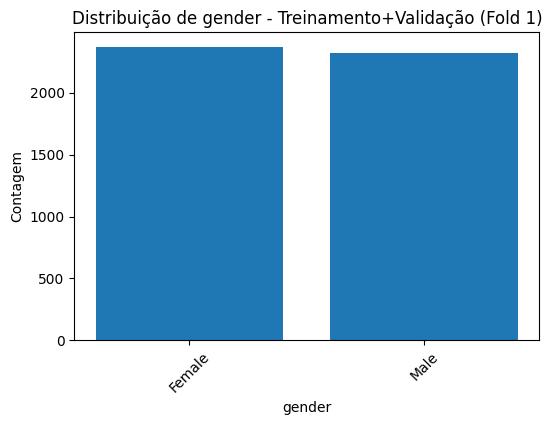

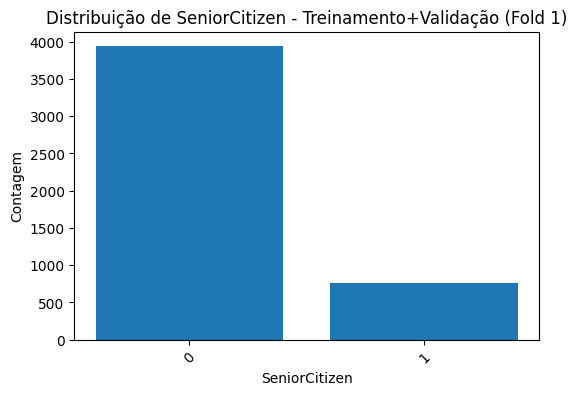

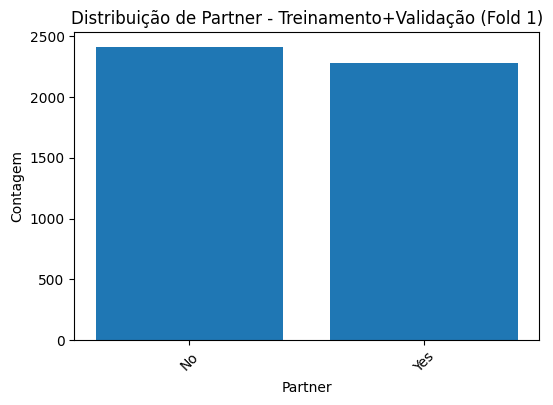

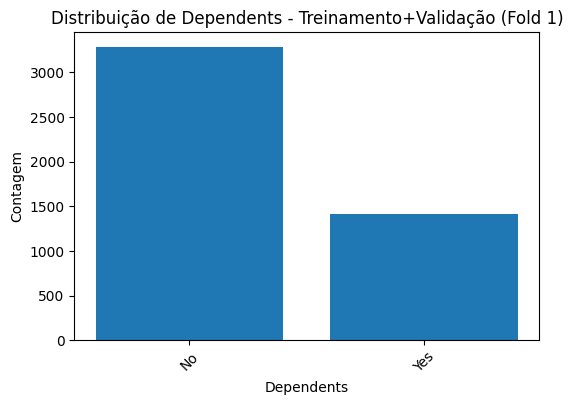

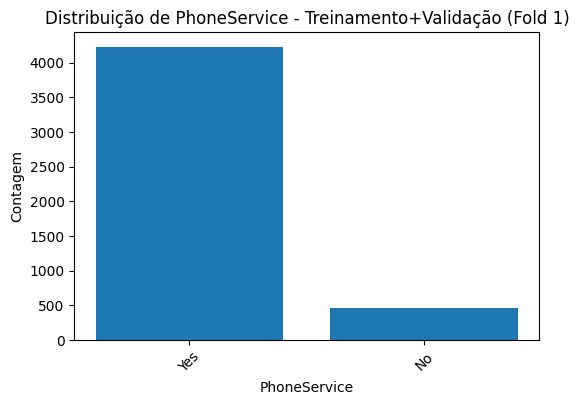

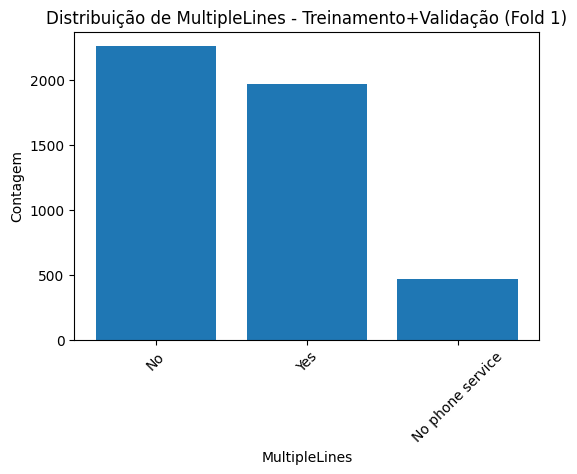

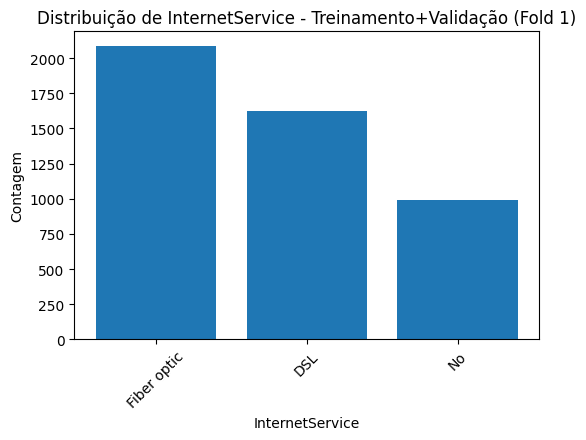

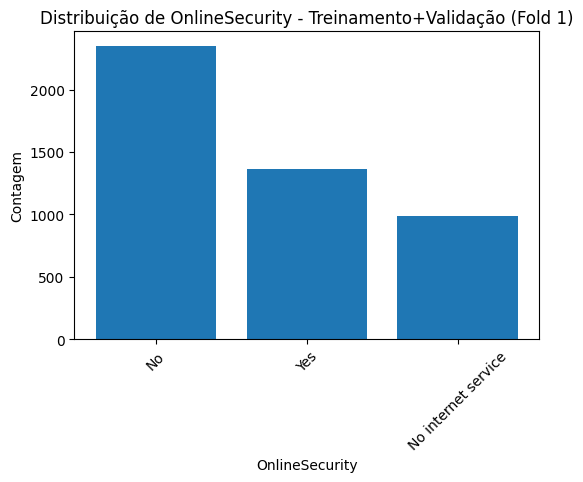

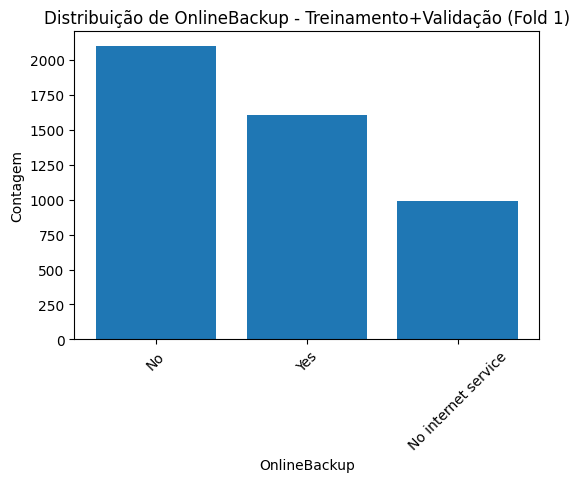

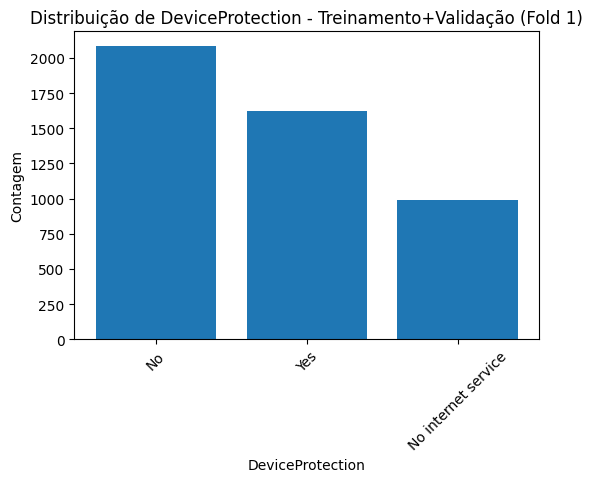

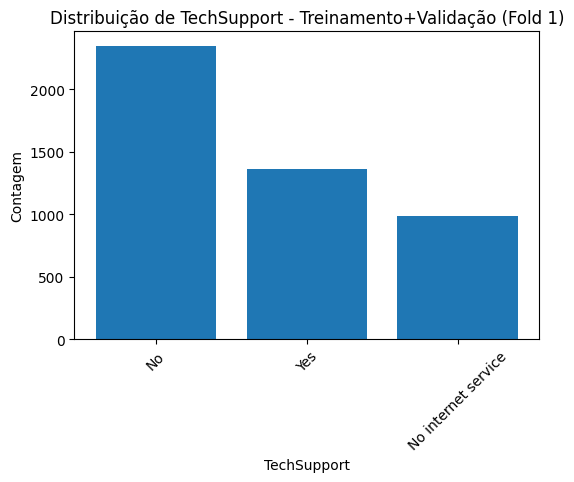

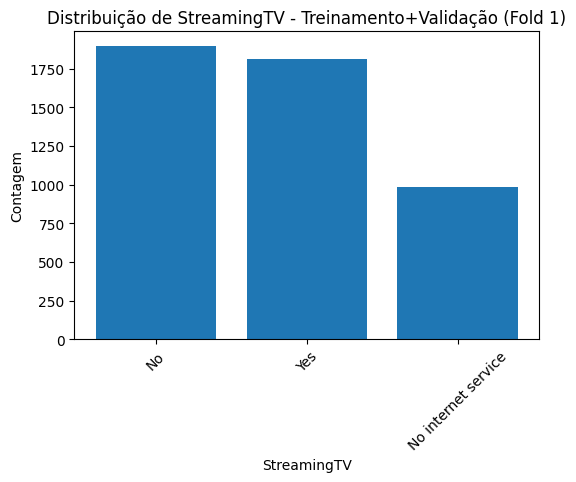

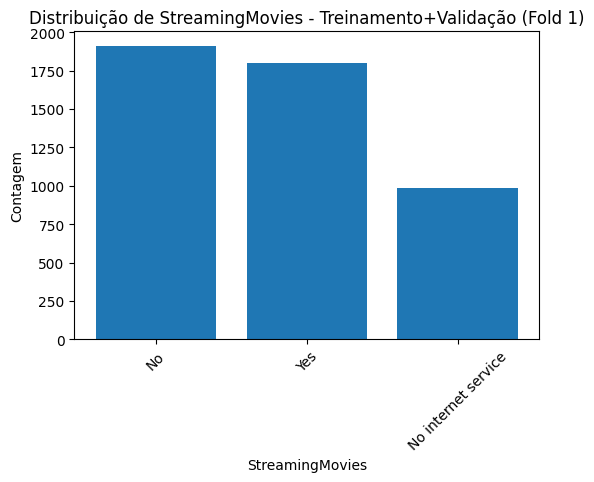

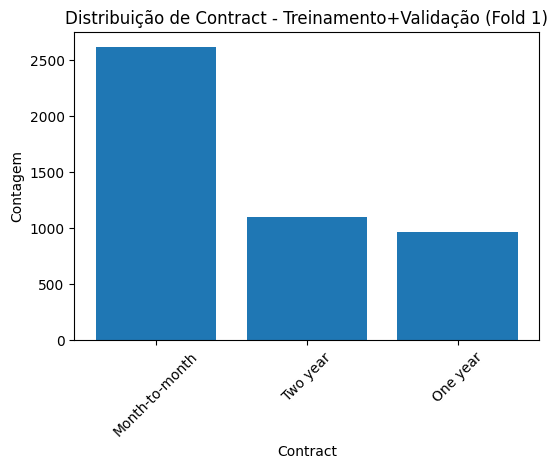

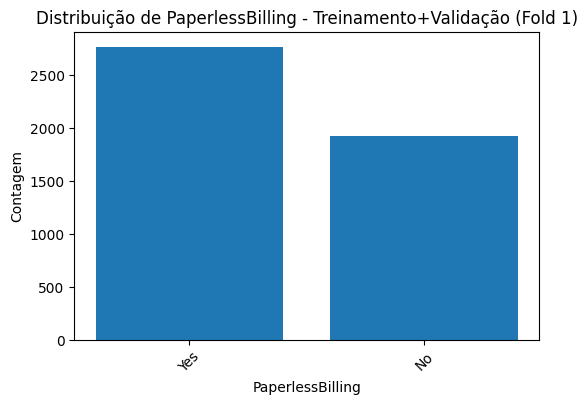

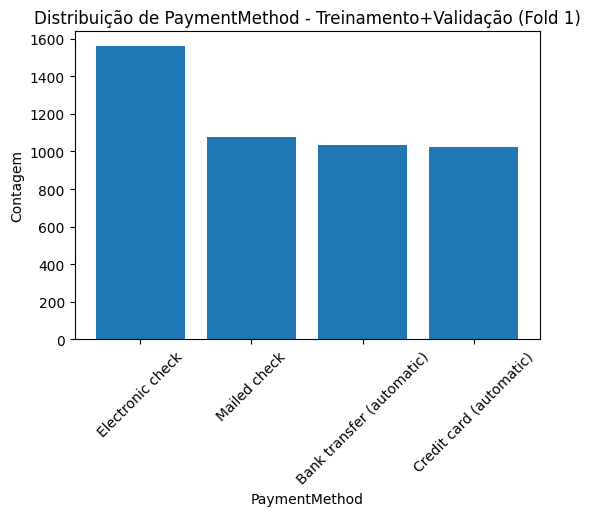

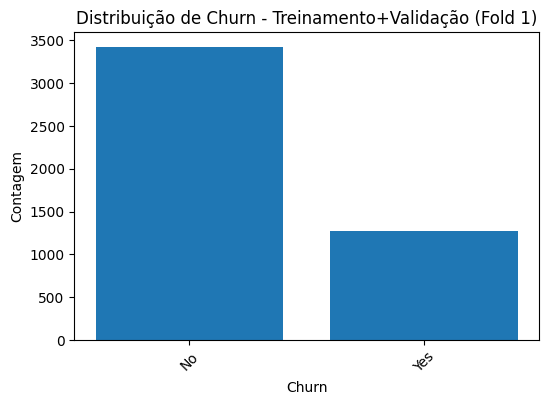


===== Experimento 2 =====

=== EDA no subset: Treinamento+Validação (Fold 2) ===

1) Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4695 entries, 0 to 4694
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            4695 non-null   object 
 1   SeniorCitizen     4695 non-null   int64  
 2   Partner           4695 non-null   object 
 3   Dependents        4695 non-null   object 
 4   tenure            4695 non-null   int64  
 5   PhoneService      4695 non-null   object 
 6   MultipleLines     4695 non-null   object 
 7   InternetService   4695 non-null   object 
 8   OnlineSecurity    4695 non-null   object 
 9   OnlineBackup      4695 non-null   object 
 10  DeviceProtection  4695 non-null   object 
 11  TechSupport       4695 non-null   object 
 12  StreamingTV       4695 non-null   object 
 13  StreamingMovies   4695 non-null   object 
 14  Contract          4695 non-nul

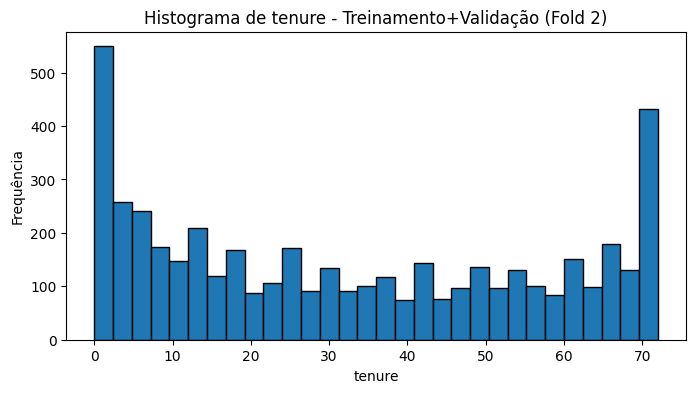

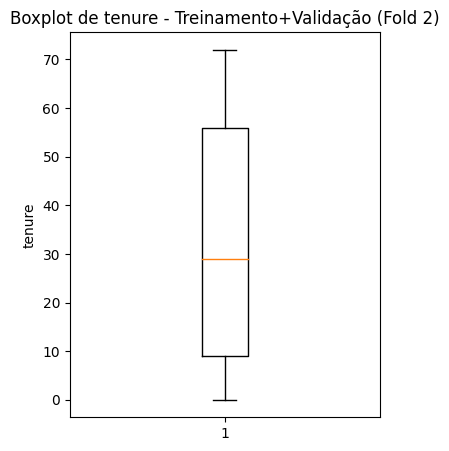

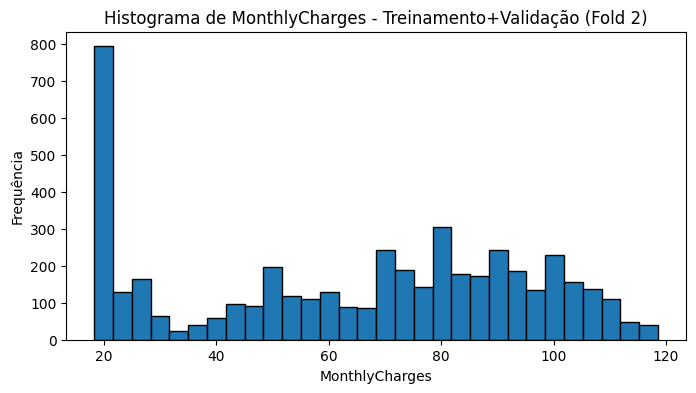

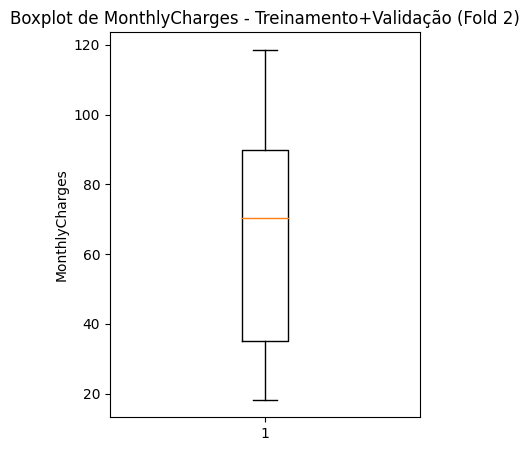

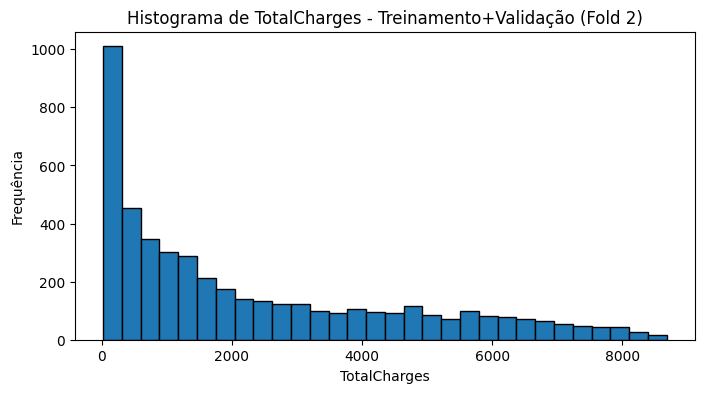

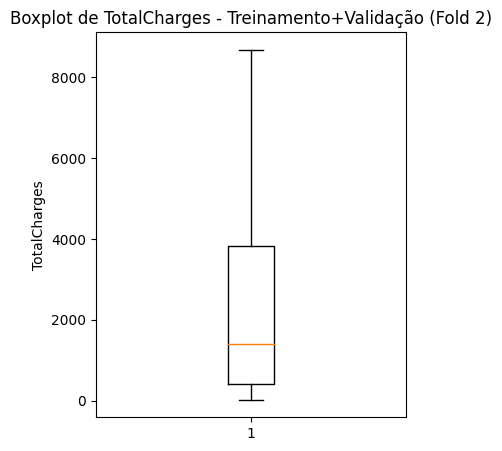

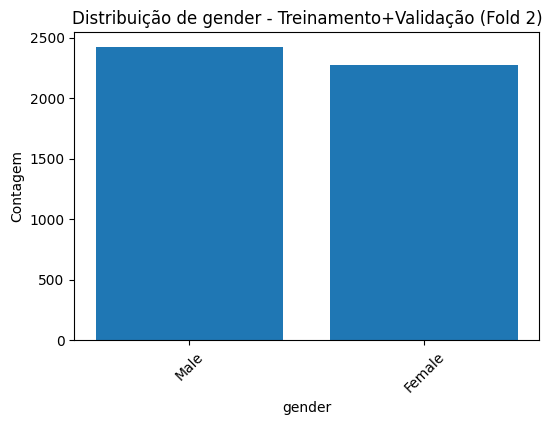

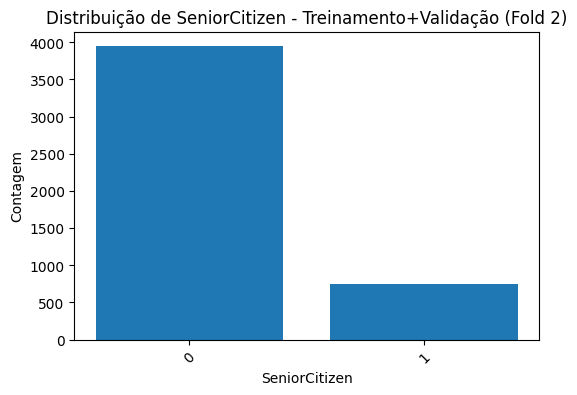

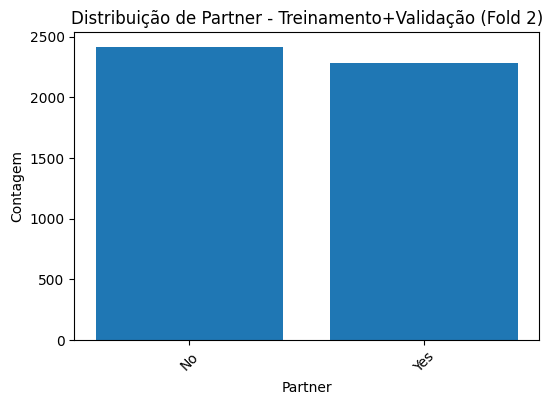

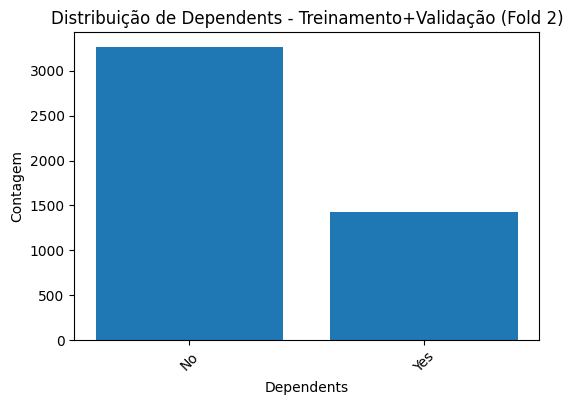

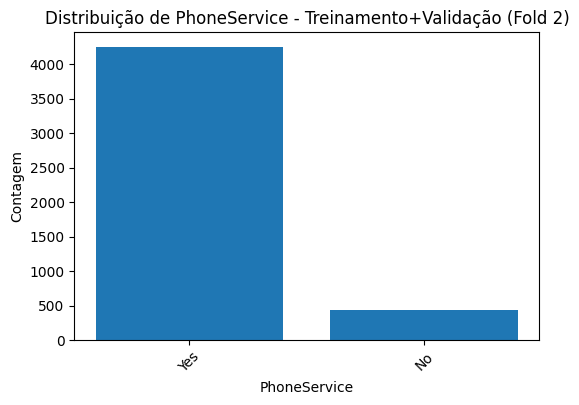

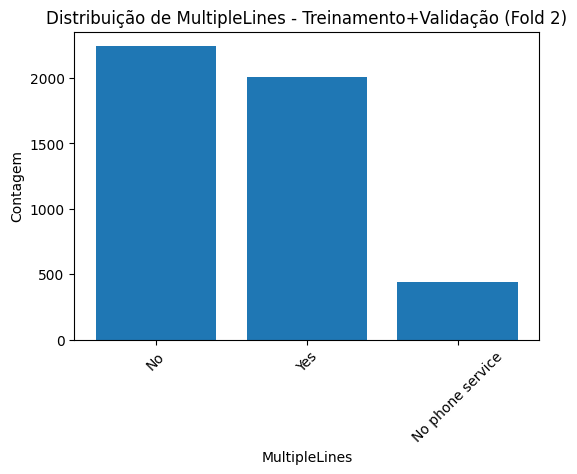

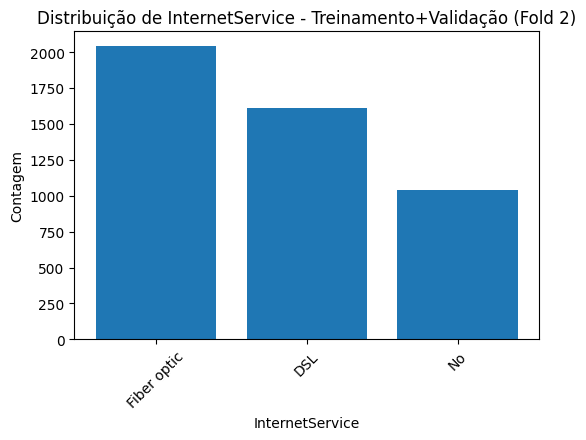

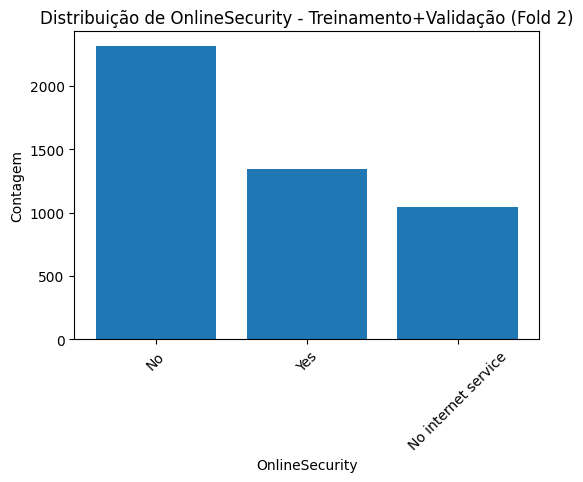

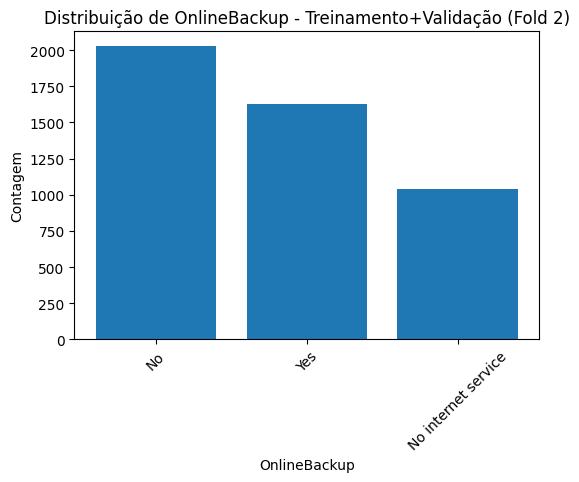

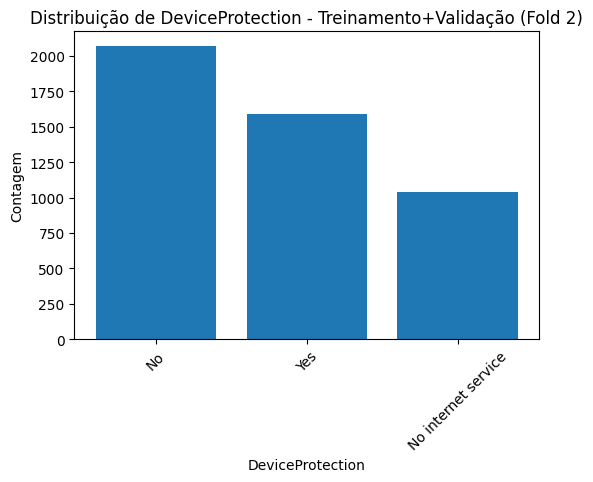

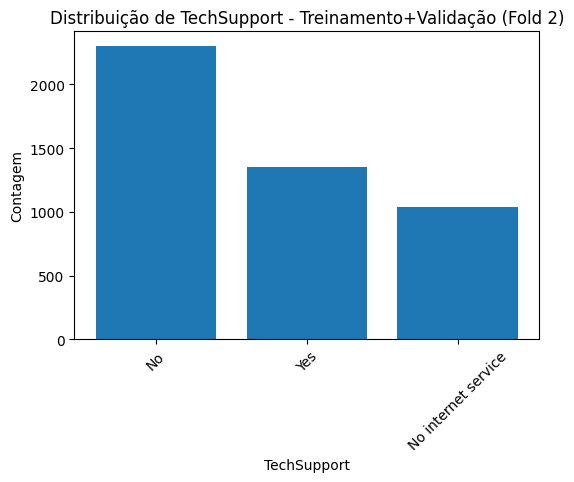

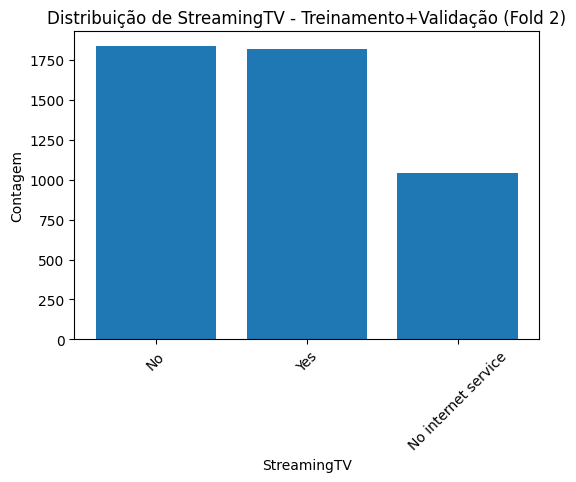

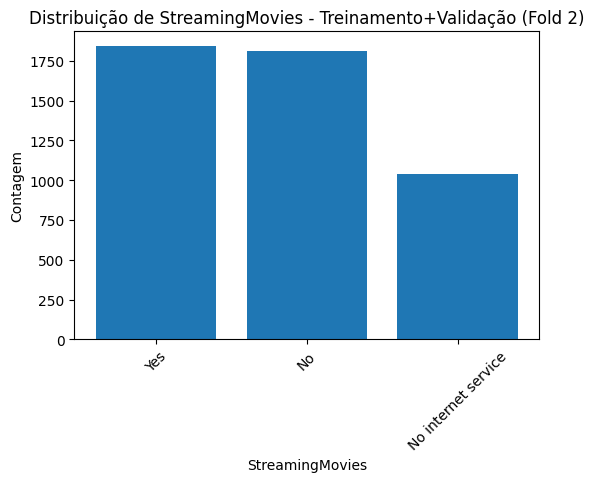

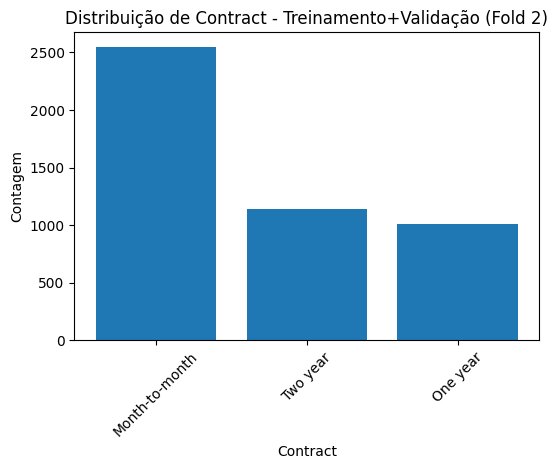

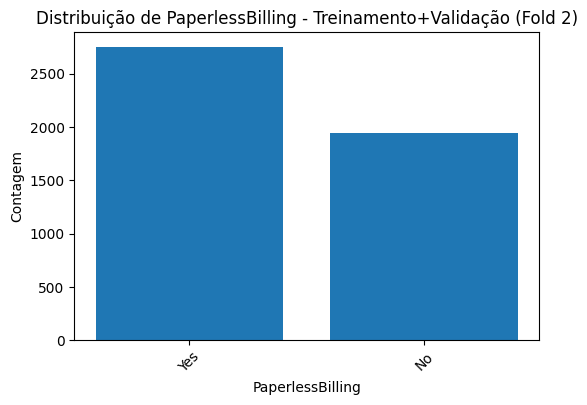

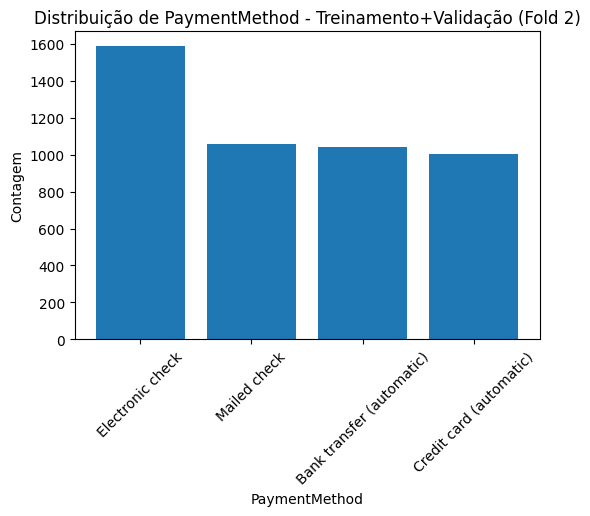

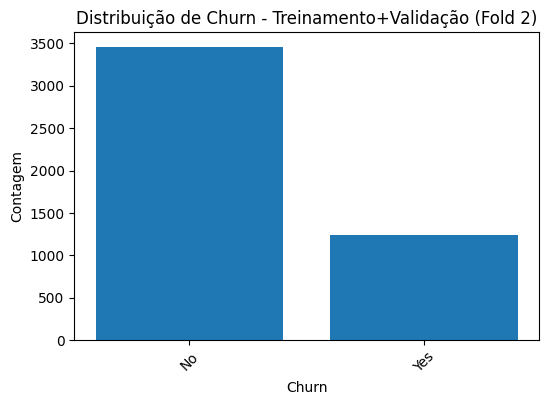


===== Experimento 3 =====

=== EDA no subset: Treinamento+Validação (Fold 3) ===

1) Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4695 entries, 0 to 4694
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            4695 non-null   object 
 1   SeniorCitizen     4695 non-null   int64  
 2   Partner           4695 non-null   object 
 3   Dependents        4695 non-null   object 
 4   tenure            4695 non-null   int64  
 5   PhoneService      4695 non-null   object 
 6   MultipleLines     4695 non-null   object 
 7   InternetService   4695 non-null   object 
 8   OnlineSecurity    4695 non-null   object 
 9   OnlineBackup      4695 non-null   object 
 10  DeviceProtection  4695 non-null   object 
 11  TechSupport       4695 non-null   object 
 12  StreamingTV       4695 non-null   object 
 13  StreamingMovies   4695 non-null   object 
 14  Contract          4695 non-nul

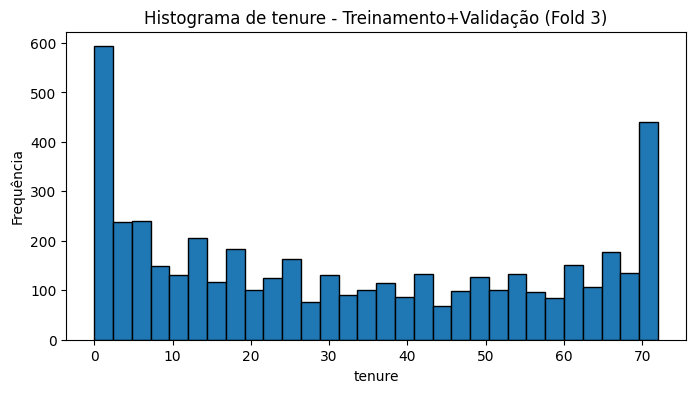

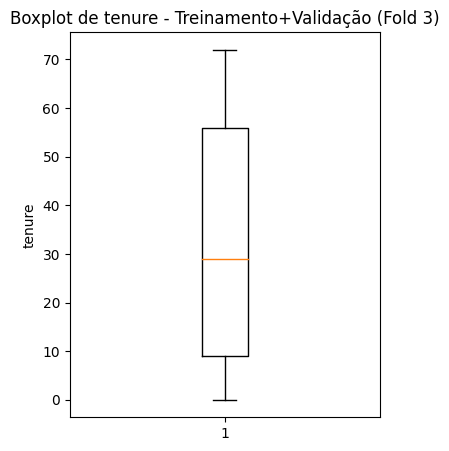

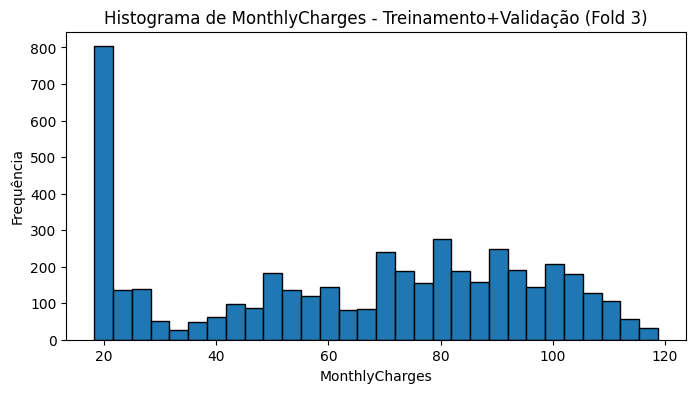

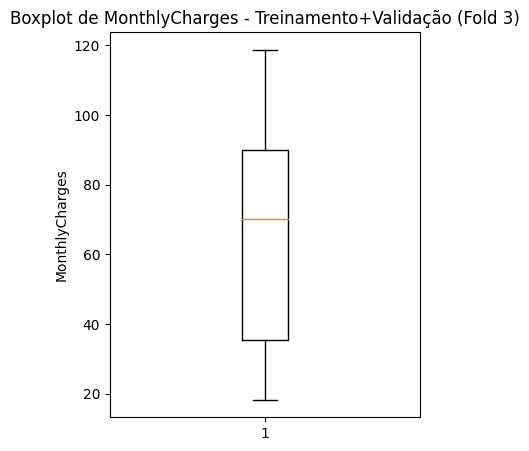

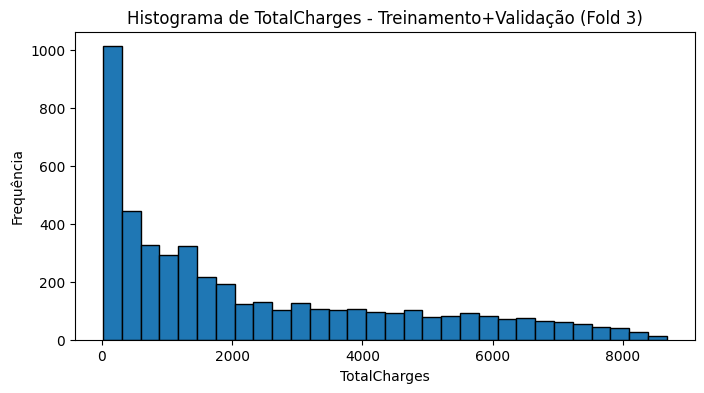

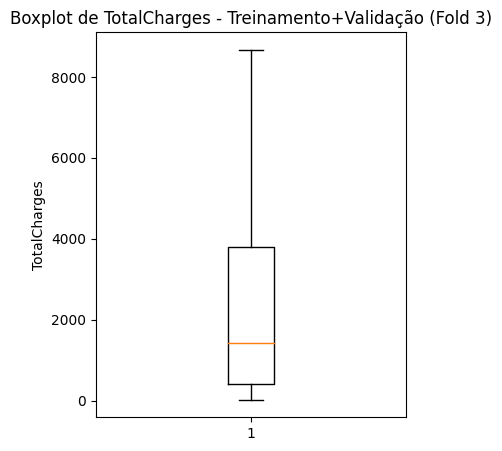

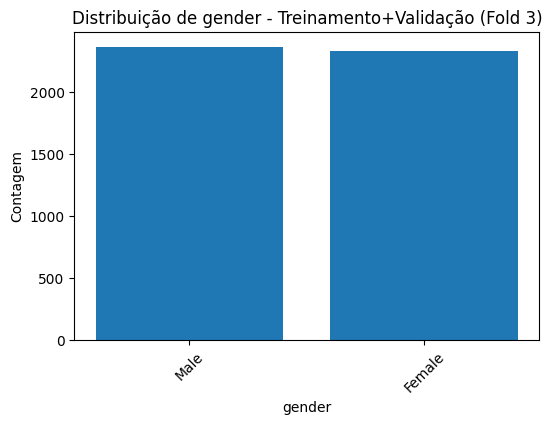

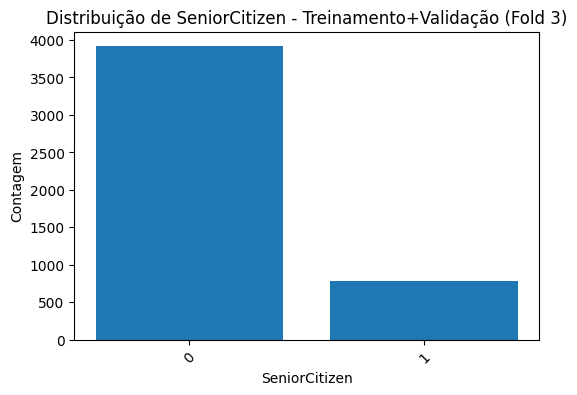

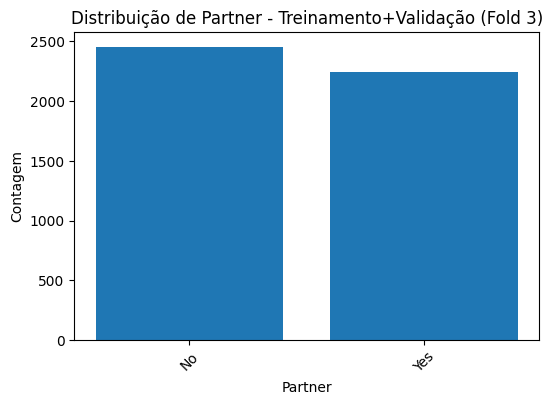

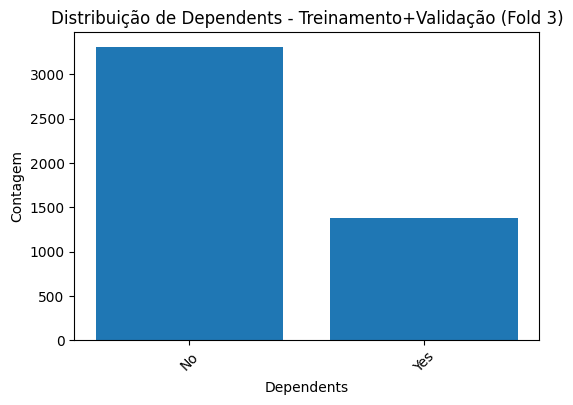

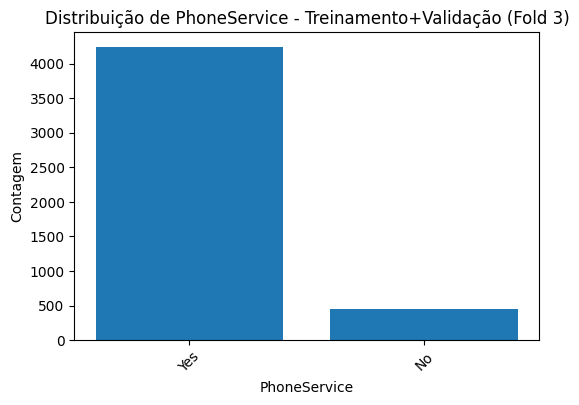

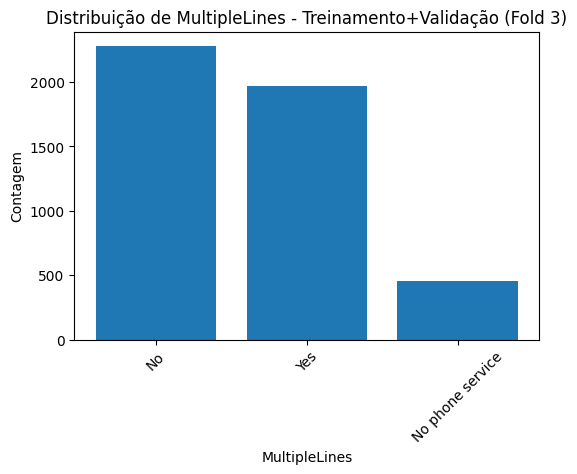

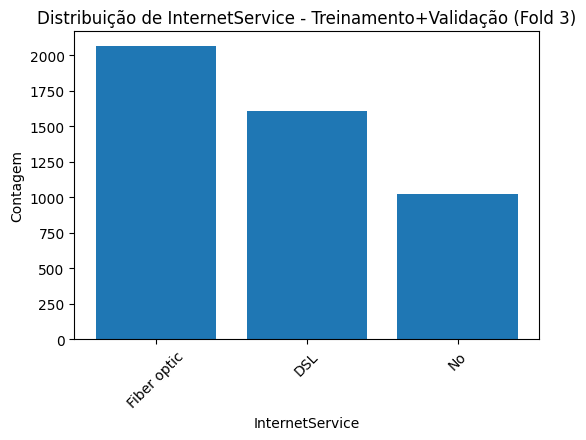

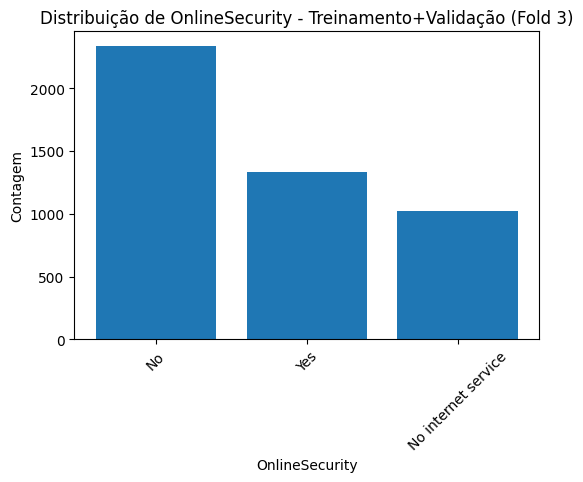

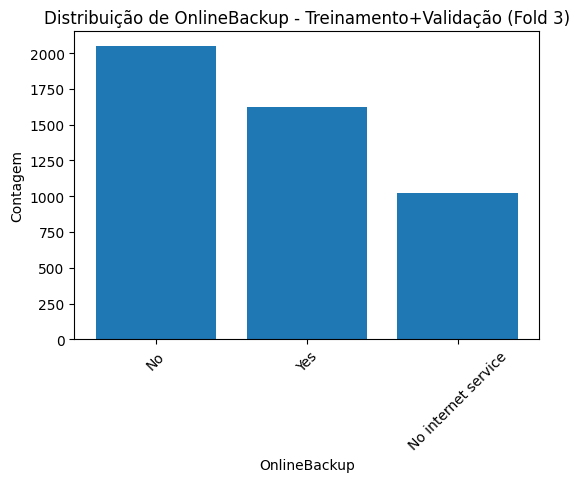

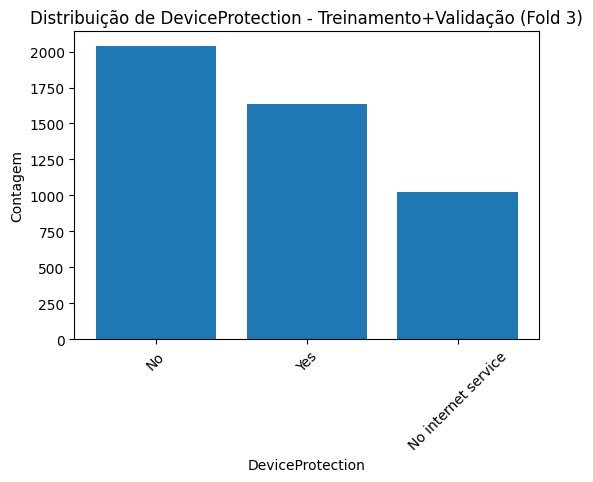

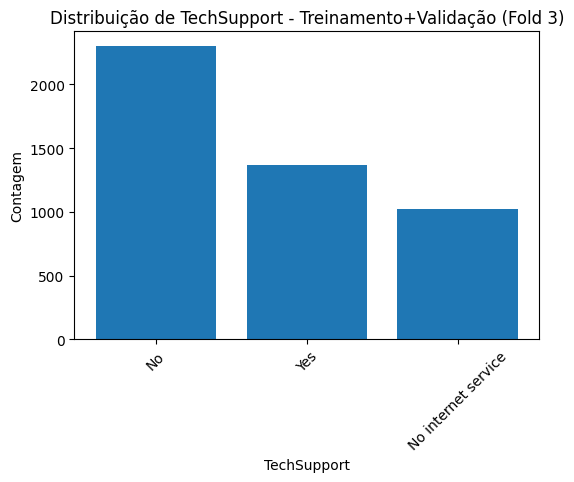

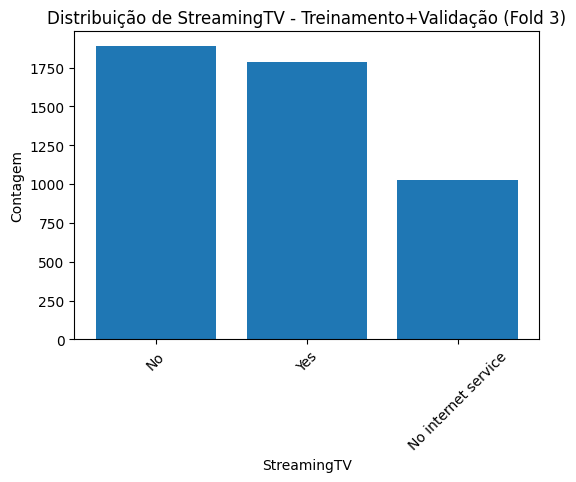

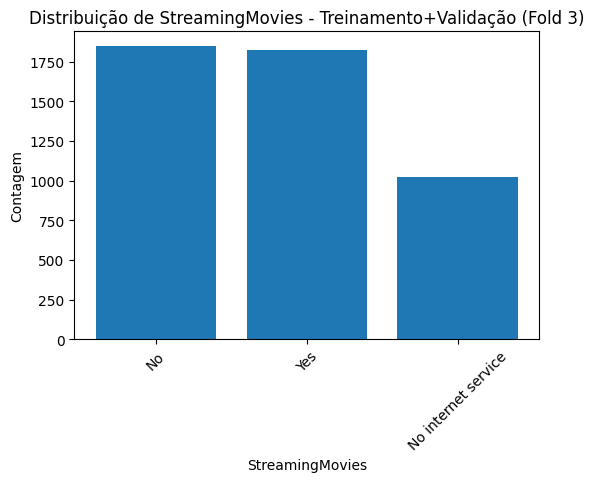

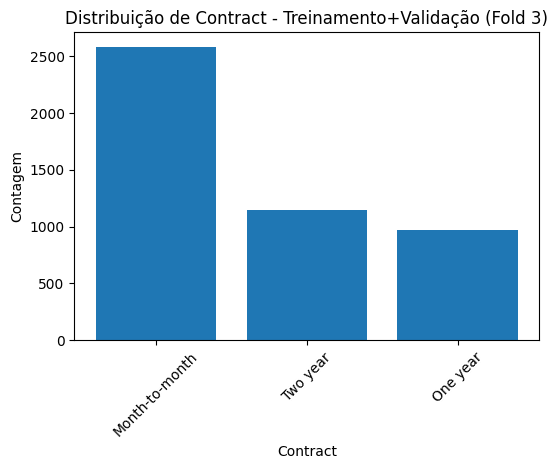

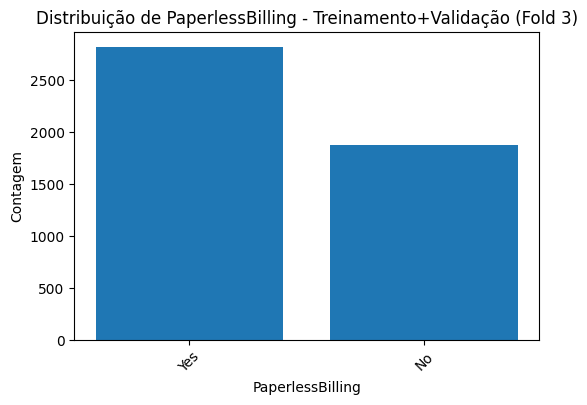

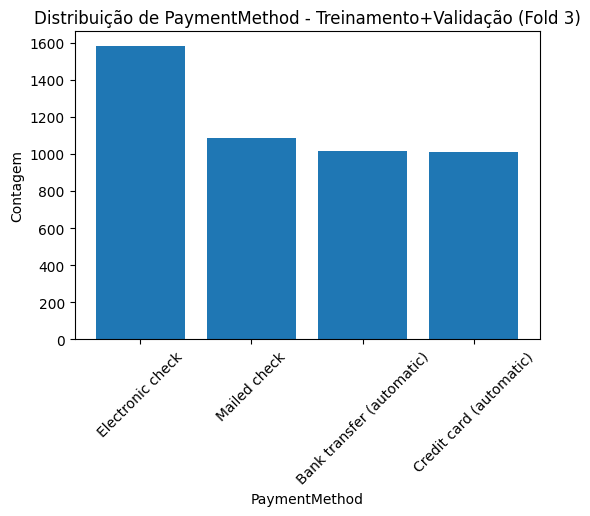

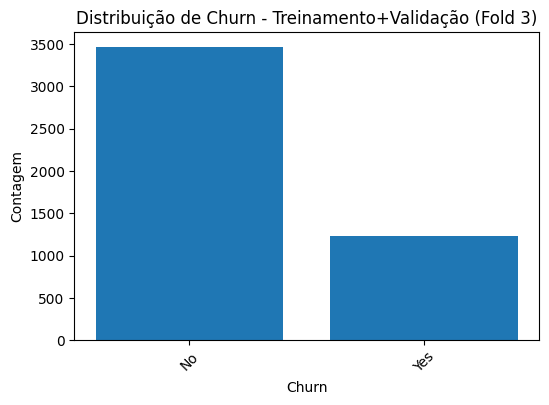

In [ ]:
# Passo 3 (versão com loop) - EDA em Treino + Val para cada fold

for i in range(3):
    print(f"\n===== Experimento {i+1} =====")
    
    # Define subsets: treinamento, validação e teste
    train_df = folds[i].copy().reset_index(drop=True)
    val_df   = folds[(i+1) % 3].copy().reset_index(drop=True)
    test_df  = folds[(i+2) % 3].copy().reset_index(drop=True)
    
    # Concatena treino e validação para EDA conjunta
    train_val_df = pd.concat([train_df, val_df], axis=0).reset_index(drop=True)
    
    # EDA no conjunto combinado de Treino + Validação
    perform_eda(train_val_df, subset_name=f"Treinamento+Validação (Fold {i+1})")
    
    # Não fazemos EDA no conjunto de teste para evitar vazamento de dados.
    # perform_eda(test_df, subset_name=f"Teste (Fold {i+1})")  # <--- NÃO RECOMENDADO


In [ ]:
import pandas as pd
import numpy as np
import os

def analyze_and_fix_issues(train_df):
    """
    Analisa o subset de treinamento quanto a outliers, dados ausentes, duplicados, etc.
    Aplica tratamentos (ex.: imputação, remoção, cestas) e retorna:
      - train_df_limpo: o dataframe após correções
      - params: dicionário com parâmetros utilizados (p.ex. limites de outliers, bins) 
                para aplicar depois em val/test.
    """
    # Copiamos para não alterar o original
    df = train_df.copy()

    # 1. Remover duplicados
    duplicates_count = df.duplicated().sum()
    if duplicates_count > 0:
        print(f"Removendo {duplicates_count} registros duplicados do treinamento.")
        df = df.drop_duplicates().reset_index(drop=True)
    
    # 2. Tratar dados ausentes
    # Exemplo: TotalCharges pode ter valores ausentes
    params = {}  # guardaremos parâmetros aqui
    if "TotalCharges" in df.columns:
        missing_tc = df["TotalCharges"].isnull().sum()
        if missing_tc > 0:
            median_tc = df["TotalCharges"].median()
            print(f"Preenchendo {missing_tc} valores ausentes em 'TotalCharges' com mediana={median_tc:.2f}")
            df["TotalCharges"].fillna(median_tc, inplace=True)
            params["TotalCharges_median"] = median_tc  # armazenamos para aplicar depois em val/test
    
    # 3. Detecção de outliers (exemplo usando IQR) em 'MonthlyCharges'
    if "MonthlyCharges" in df.columns:
        Q1 = df["MonthlyCharges"].quantile(0.25)
        Q3 = df["MonthlyCharges"].quantile(0.75)
        IQR = Q3 - Q1
        
        # Definir limites
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Salvamos para uso posterior
        params["MonthlyCharges_outlier_bounds"] = (lower_bound, upper_bound)
        
        # Capping
        df["MonthlyCharges"] = np.where(df["MonthlyCharges"] < lower_bound, lower_bound, df["MonthlyCharges"])
        df["MonthlyCharges"] = np.where(df["MonthlyCharges"] > upper_bound, upper_bound, df["MonthlyCharges"])
    
    # 4. Criação de cestas (bins)
    # Exemplo: tenure e MonthlyCharges
    if "tenure" in df.columns:
        tenure_bins = [0, 12, 24, 36, 60, np.inf]
        tenure_labels = ['0-12', '13-24', '25-36', '37-60', '60+']
        df["tenure_binned"] = pd.cut(df["tenure"], bins=tenure_bins, labels=tenure_labels, right=False)
        
        params["tenure_bins"] = tenure_bins
        params["tenure_labels"] = tenure_labels
    
    if "MonthlyCharges" in df.columns:
        mc_bins = [0, 35, 70, 105, np.inf]
        mc_labels = ['Low', 'Medium', 'High', 'Very High']
        df["MonthlyCharges_binned"] = pd.cut(df["MonthlyCharges"], bins=mc_bins, labels=mc_labels, right=False)
        
        params["mc_bins"] = mc_bins
        params["mc_labels"] = mc_labels
    
    return df, params


# Função que APLICA os parâmetros descobertos no Treino a Val/Test
def apply_issues_fixing(df, params):
    """
    Aplica as mesmas correções definidas em 'params' (descobertos no treinamento) 
    ao dataframe (validação ou teste), sem recalcular nada.
    """
    df = df.copy()  # para não alterar o original
    
    # 1. Remover duplicados (opcional)
    duplicates_count = df.duplicated().sum()
    if duplicates_count > 0:
        df = df.drop_duplicates().reset_index(drop=True)
    
    # 2. Preencher 'TotalCharges' com a mediana do treino, se existir
    if "TotalCharges_median" in params and "TotalCharges" in df.columns:
        median_tc = params["TotalCharges_median"]
        missing_tc = df["TotalCharges"].isnull().sum()
        if missing_tc > 0:
            print(f"Val/Test: Preenchendo {missing_tc} valores ausentes em 'TotalCharges' com mediana={median_tc:.2f}")
            df["TotalCharges"].fillna(median_tc, inplace=True)
    
    # 3. Outliers em 'MonthlyCharges' (capping) usando limites do treino
    if "MonthlyCharges_outlier_bounds" in params and "MonthlyCharges" in df.columns:
        (lower_bound, upper_bound) = params["MonthlyCharges_outlier_bounds"]
        df["MonthlyCharges"] = np.where(df["MonthlyCharges"] < lower_bound, lower_bound, df["MonthlyCharges"])
        df["MonthlyCharges"] = np.where(df["MonthlyCharges"] > upper_bound, upper_bound, df["MonthlyCharges"])
    
    # 4. Binning 'tenure'
    if "tenure_bins" in params and "tenure_labels" in params and "tenure" in df.columns:
        df["tenure_binned"] = pd.cut(
            df["tenure"], 
            bins=params["tenure_bins"], 
            labels=params["tenure_labels"], 
            right=False
        )
    
    # 5. Binning 'MonthlyCharges'
    if "mc_bins" in params and "mc_labels" in params and "MonthlyCharges" in df.columns:
        df["MonthlyCharges_binned"] = pd.cut(
            df["MonthlyCharges"], 
            bins=params["mc_bins"], 
            labels=params["mc_labels"], 
            right=False
        )
    
    return df


In [11]:

folds_clean_folder = "cleaned_data"
os.makedirs(folds_clean_folder, exist_ok=True)

for i in range(3):
    print(f"\n===== Fold {i+1} =====")
    
    # Subsets
    train_df = folds[i].copy().reset_index(drop=True)
    val_df   = folds[(i+1) % 3].copy().reset_index(drop=True)
    test_df  = folds[(i+2) % 3].copy().reset_index(drop=True)
    
    # 1) Descobrir e aplicar transformações no TRAIN
    train_df_clean, train_params = analyze_and_fix_issues(train_df)
    
    # 2) Aplicar as MESMAS transformações no VAL e TEST
    val_df_clean  = apply_issues_fixing(val_df, train_params)
    test_df_clean = apply_issues_fixing(test_df, train_params)
    
    # 3) Salvar CSVs limpos (Treino, Val, Test)
    train_csv = os.path.join(folds_clean_folder, f"train_fold_{i+1}_clean.csv")
    val_csv   = os.path.join(folds_clean_folder, f"val_fold_{i+1}_clean.csv")
    test_csv  = os.path.join(folds_clean_folder, f"test_fold_{i+1}_clean.csv")
    
    train_df_clean.to_csv(train_csv, index=False)
    val_df_clean.to_csv(val_csv, index=False)
    test_df_clean.to_csv(test_csv, index=False)
    
    print(f"Treino limpo (Fold {i+1}) salvo em: {train_csv}")
    print(f"Val limpo (Fold {i+1}) salvo em:    {val_csv}")
    print(f"Test limpo (Fold {i+1}) salvo em:   {test_csv}")



===== Fold 1 =====
Removendo 2 registros duplicados do treinamento.
Preenchendo 3 valores ausentes em 'TotalCharges' com mediana=1385.85
Val/Test: Preenchendo 3 valores ausentes em 'TotalCharges' com mediana=1385.85
Val/Test: Preenchendo 5 valores ausentes em 'TotalCharges' com mediana=1385.85
Treino limpo (Fold 1) salvo em: cleaned_data/train_fold_1_clean.csv
Val limpo (Fold 1) salvo em:    cleaned_data/val_fold_1_clean.csv
Test limpo (Fold 1) salvo em:   cleaned_data/test_fold_1_clean.csv

===== Fold 2 =====
Removendo 3 registros duplicados do treinamento.
Preenchendo 3 valores ausentes em 'TotalCharges' com mediana=1366.03
Val/Test: Preenchendo 5 valores ausentes em 'TotalCharges' com mediana=1366.03
Val/Test: Preenchendo 3 valores ausentes em 'TotalCharges' com mediana=1366.03
Treino limpo (Fold 2) salvo em: cleaned_data/train_fold_2_clean.csv
Val limpo (Fold 2) salvo em:    cleaned_data/val_fold_2_clean.csv
Test limpo (Fold 2) salvo em:   cleaned_data/test_fold_2_clean.csv

=====

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

cat_cols = [
    "gender", "SeniorCitizen", "Partner", "Dependents",
    "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity",
    "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV",
    "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod",
    "tenure_binned", "MonthlyCharges_binned"
]
# Variáveis numéricas
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
# Variável alvo
target_col = "Churn"

# Pasta onde estão os CSVs de treinamento limpos e onde salvaremos os resultados
cleaned_data_folder = "cleaned_data"
encoded_data_folder = "encoded_data"
tree_data_folder    = "tree_data"

os.makedirs(encoded_data_folder, exist_ok=True)
os.makedirs(tree_data_folder, exist_ok=True)

def encode_categorical(train_df, val_df, test_df, categorical_cols):
    """
    Ajusta um OneHotEncoder somente no subset de treinamento (para evitar data leakage)
    e aplica a mesma codificação em val_df e test_df.
    
    Retorna:
      - train_encoded, val_encoded, test_encoded (dataframes já codificados, sem a coluna-alvo removida)
      - encoder (caso deseje armazenar/consultar os atributos do encoder)
    """
    # 1) Ajusta o encoder SOMENTE no subset de treinamento
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoder.fit(train_df[categorical_cols])
    
    # 2) Transforma cada subset
    # A) Treinamento
    train_encoded_array = encoder.transform(train_df[categorical_cols])
    train_encoded_df = pd.DataFrame(
        train_encoded_array, 
        columns=encoder.get_feature_names_out(categorical_cols)
    ).reset_index(drop=True)
    
    # B) Validação
    val_encoded_array = encoder.transform(val_df[categorical_cols])
    val_encoded_df = pd.DataFrame(
        val_encoded_array,
        columns=encoder.get_feature_names_out(categorical_cols)
    ).reset_index(drop=True)
    
    # C) Teste
    test_encoded_array = encoder.transform(test_df[categorical_cols])
    test_encoded_df = pd.DataFrame(
        test_encoded_array,
        columns=encoder.get_feature_names_out(categorical_cols)
    ).reset_index(drop=True)
    
    # 3) Concatenar as colunas numéricas (e qualquer outra que queira manter, como a coluna alvo)
    train_encoded = pd.concat([
        train_df[num_cols].reset_index(drop=True),
        train_encoded_df,
        train_df[[target_col]].reset_index(drop=True)  # Mantém Churn junto, se desejar
    ], axis=1)
    
    val_encoded = pd.concat([
        val_df[num_cols].reset_index(drop=True),
        val_encoded_df,
        val_df[[target_col]].reset_index(drop=True)
    ], axis=1)
    
    test_encoded = pd.concat([
        test_df[num_cols].reset_index(drop=True),
        test_encoded_df,
        test_df[[target_col]].reset_index(drop=True)
    ], axis=1)
    
    return train_encoded, val_encoded, test_encoded, encoder

# Loop para processar cada fold
for i in range(3):
    print(f"\n=== Codificação - Fold {i+1} ===")
    
    # 1) Carregar os CSVs de treinamento limpos, val e teste (gerados no passo anterior)
    train_csv = os.path.join(cleaned_data_folder, f"train_fold_{i+1}_clean.csv")
    val_csv   = os.path.join(cleaned_data_folder, f"val_fold_{i+1}_clean.csv")
    test_csv  = os.path.join(cleaned_data_folder, f"test_fold_{i+1}_clean.csv")
    
    train_df_clean = pd.read_csv(train_csv)
    val_df_clean   = pd.read_csv(val_csv)
    test_df_clean  = pd.read_csv(test_csv)
    
    # 2) Codificar dados categóricos (One-Hot) para modelos neurais / lineares
    train_encoded, val_encoded, test_encoded, encoder = encode_categorical(
        train_df_clean, val_df_clean, test_df_clean, cat_cols
    )
    
    # 3) Salvar as versões codificadas em CSV
    train_encoded_path = os.path.join(encoded_data_folder, f"train_fold_{i+1}_encoded.csv")
    val_encoded_path   = os.path.join(encoded_data_folder, f"val_fold_{i+1}_encoded.csv")
    test_encoded_path  = os.path.join(encoded_data_folder, f"test_fold_{i+1}_encoded.csv")
    
    train_encoded.to_csv(train_encoded_path, index=False)
    val_encoded.to_csv(val_encoded_path, index=False)
    test_encoded.to_csv(test_encoded_path, index=False)
    
    print(f"Salvo dataset codificado (Treino) em: {train_encoded_path}")
    print(f"Salvo dataset codificado (Val) em:    {val_encoded_path}")
    print(f"Salvo dataset codificado (Teste) em:  {test_encoded_path}")
    
    # 4) Para modelos baseados em árvore, mantemos as variáveis categóricas originais.
    #    Então, basta salvar esses mesmos dataframes (limpos) SEM One-Hot:
    train_tree_path = os.path.join(tree_data_folder, f"train_fold_{i+1}_tree.csv")
    val_tree_path   = os.path.join(tree_data_folder, f"val_fold_{i+1}_tree.csv")
    test_tree_path  = os.path.join(tree_data_folder, f"test_fold_{i+1}_tree.csv")
    
    train_df_clean.to_csv(train_tree_path, index=False)
    val_df_clean.to_csv(val_tree_path, index=False)
    test_df_clean.to_csv(test_tree_path, index=False)
    
    print(f"Salvo dataset (Treino) sem codificação em: {train_tree_path}")
    print(f"Salvo dataset (Val)   sem codificação em: {val_tree_path}")
    print(f"Salvo dataset (Teste) sem codificação em: {test_tree_path}")



=== Codificação - Fold 1 ===
Salvo dataset codificado (Treino) em: encoded_data/train_fold_1_encoded.csv
Salvo dataset codificado (Val) em:    encoded_data/val_fold_1_encoded.csv
Salvo dataset codificado (Teste) em:  encoded_data/test_fold_1_encoded.csv
Salvo dataset (Treino) sem codificação em: tree_data/train_fold_1_tree.csv
Salvo dataset (Val)   sem codificação em: tree_data/val_fold_1_tree.csv
Salvo dataset (Teste) sem codificação em: tree_data/test_fold_1_tree.csv

=== Codificação - Fold 2 ===
Salvo dataset codificado (Treino) em: encoded_data/train_fold_2_encoded.csv
Salvo dataset codificado (Val) em:    encoded_data/val_fold_2_encoded.csv
Salvo dataset codificado (Teste) em:  encoded_data/test_fold_2_encoded.csv
Salvo dataset (Treino) sem codificação em: tree_data/train_fold_2_tree.csv
Salvo dataset (Val)   sem codificação em: tree_data/val_fold_2_tree.csv
Salvo dataset (Teste) sem codificação em: tree_data/test_fold_2_tree.csv

=== Codificação - Fold 3 ===
Salvo dataset codifi

In [15]:
# Lista de colunas numéricas (ajuste conforme sua base e suas preferências)
numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges"]  
# Variável alvo
target_col = "Churn"

# Pastas de origem (com dados codificados) e destino (dados normalizados)
encoded_data_folder = "encoded_data"
scaled_data_folder = "scaled_data"
os.makedirs(scaled_data_folder, exist_ok=True)

def minmax_scale_data(train_df, val_df, test_df, numeric_cols):
    """
    Ajusta o MinMaxScaler somente no subset de treinamento e aplica a val/test.
    Retorna dataframes escalados + o scaler, caso você queira guardar ou consultar.
    """
    # 1) Criar e ajustar o scaler somente com dados de treino (evitando data leakage)
    scaler = MinMaxScaler()
    scaler.fit(train_df[numeric_cols])
    
    # 2) Copiar os dataframes para não sobrescrever
    train_scaled = train_df.copy()
    val_scaled   = val_df.copy()
    test_scaled  = test_df.copy()
    
    # 3) Aplicar a transformação
    train_scaled[numeric_cols] = scaler.transform(train_df[numeric_cols])
    val_scaled[numeric_cols]   = scaler.transform(val_df[numeric_cols])
    test_scaled[numeric_cols]  = scaler.transform(test_df[numeric_cols])
    
    return train_scaled, val_scaled, test_scaled, scaler

# Loop para processar cada fold
for i in range(3):
    print(f"\n=== Normalização (Min-Max) - Fold {i+1} ===")
    
    # 1) Carregar os CSVs codificados do Passo 5 (Treino, Val, Test)
    train_encoded_path = os.path.join(encoded_data_folder, f"train_fold_{i+1}_encoded.csv")
    val_encoded_path   = os.path.join(encoded_data_folder, f"val_fold_{i+1}_encoded.csv")
    test_encoded_path  = os.path.join(encoded_data_folder, f"test_fold_{i+1}_encoded.csv")
    
    train_encoded = pd.read_csv(train_encoded_path)
    val_encoded   = pd.read_csv(val_encoded_path)
    test_encoded  = pd.read_csv(test_encoded_path)
    
    # 2) Aplicar o MinMaxScaler somente nas colunas numéricas
    train_scaled, val_scaled, test_scaled, scaler = minmax_scale_data(
        train_encoded, val_encoded, test_encoded, numeric_cols
    )
    
    # 3) Salvar os dataframes escalados em CSV (na pasta scaled_data)
    train_scaled_path = os.path.join(scaled_data_folder, f"train_fold_{i+1}_scaled.csv")
    val_scaled_path   = os.path.join(scaled_data_folder, f"val_fold_{i+1}_scaled.csv")
    test_scaled_path  = os.path.join(scaled_data_folder, f"test_fold_{i+1}_scaled.csv")
    
    train_scaled.to_csv(train_scaled_path, index=False)
    val_scaled.to_csv(val_scaled_path, index=False)
    test_scaled.to_csv(test_scaled_path, index=False)
    
    print(f"Salvo dataset escalonado (Treino) em: {train_scaled_path}")
    print(f"Salvo dataset escalonado (Val) em:    {val_scaled_path}")
    print(f"Salvo dataset escalonado (Teste) em:  {test_scaled_path}")



=== Normalização (Min-Max) - Fold 1 ===
Salvo dataset escalonado (Treino) em: scaled_data/train_fold_1_scaled.csv
Salvo dataset escalonado (Val) em:    scaled_data/val_fold_1_scaled.csv
Salvo dataset escalonado (Teste) em:  scaled_data/test_fold_1_scaled.csv

=== Normalização (Min-Max) - Fold 2 ===
Salvo dataset escalonado (Treino) em: scaled_data/train_fold_2_scaled.csv
Salvo dataset escalonado (Val) em:    scaled_data/val_fold_2_scaled.csv
Salvo dataset escalonado (Teste) em:  scaled_data/test_fold_2_scaled.csv

=== Normalização (Min-Max) - Fold 3 ===
Salvo dataset escalonado (Treino) em: scaled_data/train_fold_3_scaled.csv
Salvo dataset escalonado (Val) em:    scaled_data/val_fold_3_scaled.csv
Salvo dataset escalonado (Teste) em:  scaled_data/test_fold_3_scaled.csv
